In [99]:
import numpy as np
import dicom
import matplotlib.pyplot as plt
import pyfits
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
import sklearn, sklearn.preprocessing
from skimage.restoration import denoise_nl_means
%matplotlib inline

In [100]:
def cropHeart(inp):
    """
    Crop the heart so that all the padding is done away with.
    Output cropped heart.
    """
    # argwhere will give you the coordinates of every non-zero point
    true_points = np.argwhere(inp)
    # take the smallest points and use them as the top left of your crop
    top_left = true_points.min(axis=0)
    # take the largest points and use them as the bottom right of your crop
    bottom_right = true_points.max(axis=0)
    out = inp[top_left[0]:bottom_right[0]+1,  # plus 1 because slice isn't
          top_left[1]:bottom_right[1]+1,   # inclusive
          top_left[2]:bottom_right[2]+1]  
    print(out.shape, "cropped from", inp.shape)
    return out

def plotHeart(inData, cols):
    fig, ax = plt.subplots(cols,cols)
    k = 0
    fig.suptitle("Slices of heart data")
    for i in np.arange(cols):
        for j in np.arange(cols):
            ax[i,j].imshow(inData[k])
            ax[i,j].axis("off")
            k = k + inData.shape[0]/(cols**2) +1
    print(k)
    
def normalise(inData):
    """
    Normalise 3D data.
    """
    inDataAbs = np.fabs(inData)
    inDataMax = np.amax(inData)
    croppednorm = inDataAbs/inDataMax
    return croppednorm

In [97]:
ds0 = dicom.read_file("./data/nlst/7/RESTRECONFBPNONAC/1.2.826.0.1.3680043.8.373.1.149242122.1391620200.dcm")
px0 = ds0.pixel_array

ds1 = dicom.read_file("./data/nlst/7/STRESSRECONFBPNONAC/1.2.826.0.1.3680043.8.373.1.1793586668.13916201980.dcm")
px1 = ds1.pixel_array

#ds2 = pyfits.open("/tmp/rest_artefact_0000.fits")[0].data

In [105]:
cropped = cropHeart(px1)
croppednorm = normalise(cropped)
denoised = denoise_nl_means(croppednorm, h=0.1, multichannel=False)
#plotHeart(cropped, 3)
cropped0 = cropHeart(px0)
#cropped1 = normalise(cropHeart(ds2))

((23, 15, 23), 'cropped from', (37, 64, 64))
((23, 16, 22), 'cropped from', (36, 64, 64))


In [106]:
print(croppednorm[10])
print(cropped[10])

[[ 0.          0.          0.          0.          0.00456621  0.00913242
   0.03652968  0.1369863   0.16894977  0.20547946  0.23744293  0.24657534
   0.22374429  0.18264841  0.1369863   0.08675799  0.00456621  0.00456621
   0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.02283105  0.1780822   0.29223743
   0.33333334  0.35159817  0.36529681  0.39269406  0.44292238  0.45662099
   0.39726028  0.2739726   0.15981735  0.11415525  0.12785389  0.14155251
   0.08219178  0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.29223743  0.35159817  0.43378997
   0.55251139  0.62557077  0.63926941  0.63470322  0.67123288  0.70776254
   0.6438356   0.47945204  0.29223743  0.1780822   0.14611872  0.15525115
   0.15525115  0.10045662  0.          0.          0.        ]
 [ 0.          0.0456621   0.3242009   0.34246576  0.3561644   0.48401827
   0.68493152  0.80821919  0.79452056  0.72146118  0.72146118  0.794520

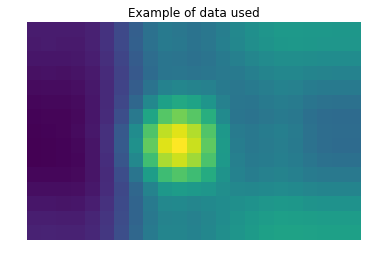

In [107]:
fig = plt.figure()
ax = fig.add_subplot(111)
data = denoised[0]

def animate(i):
    data = denoised[i]
    return ax.imshow(data)

plt.axis("off")
plt.title("Example of data used")
anim = animation.FuncAnimation(fig, animate, frames=np.arange(cropped.shape[0]), repeat=False)
anim.save("/tmp/3D-Data-Example.mp4")

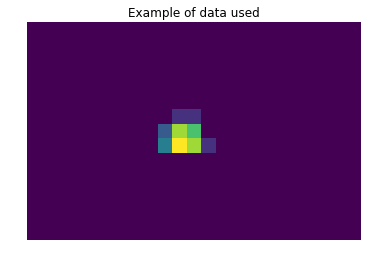

In [104]:
fig = plt.figure()
ax = fig.add_subplot(111)
data = croppednorm[0]

def animate(i):
    data = croppednorm[i]
    return ax.imshow(data)

plt.axis("off")
plt.title("Example of data used")
anim = animation.FuncAnimation(fig, animate, frames=np.arange(croppednorm.shape[0]), repeat=False)
anim.save("/tmp/3D-Data-Example1.mp4")

In [47]:
from mayavi import mlab

In [49]:
mlab.pipeline.image_plane_widget(mlab.pipeline.scalar_field(denoised),
                            plane_orientation='x_axes',
                            slice_index=cropped.shape[0]/2,
                        )
mlab.pipeline.image_plane_widget(mlab.pipeline.scalar_field(denoised),
                            plane_orientation='y_axes',
                            slice_index=cropped.shape[1]/2,
                        )

mlab.pipeline.image_plane_widget(mlab.pipeline.scalar_field(denoised),
                            plane_orientation='z_axes',
                            slice_index=cropped.shape[2]/2,
                        )
mlab.axes()
mlab.show()